# Growth Seasons: The Analysis of Remote Sensing Data

### Behrouz Raftari


### Problem
The focus of this report is to analyze the growth seasons based on a dataset generated with remote sensing. The data have been recorded daily per area for less than two years in -- state in country --. Data owned by Satelligence in Utrecht, The Netherlands.

The data is NDVI type data which NDVI satns for Normalized Difference Vegetation Index. NDVI quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs). The calculation of NDVI follows the following formula:

NDVI = (NIR - RED) / (NIR - RED). 

where NIR stans for near-infrared. The result of this formula generates a value between -1 and +1.



### 1. Loading and inspecting the data

The dataset is available in the xls format, so as the first step and to take advantage of Pandas library, the data is converted into a DataFrame style.

In [1]:
# Import pandas library
import pandas as pd

# Load the dataset
df = pd.read_excel(r'/home/behrouz/Documents/Jobs/Satelligence/assignment/MMR_Shan_NDVI_daily_township_raw.xls')

In [2]:
# Inspect dataset, the first rows
df.head(10)

,area_id,time,count,max,mean,min,std,var
0,18.0,2017-05-01,37629,1.042882,0.715773,0.214944,0.104332,0.010885
1,NaN,2017-05-02,13274,0.960933,0.754802,0.382842,0.084135,0.007079
2,NaN,2017-05-03,11436,0.968779,0.744718,0.205908,0.075562,0.005710
3,NaN,2017-05-04,66070,0.949082,0.745399,0.466319,0.063372,0.004016
4,NaN,2017-05-05,23539,0.930539,0.754737,0.074077,0.073416,0.005390
5,NaN,2017-05-06,8,0.761998,0.712476,0.615921,0.053140,0.002824
6,NaN,2017-05-07,17043,0.990952,0.755186,0.050998,0.078687,0.006192
7,NaN,2017-05-08,10745,1.074654,0.739910,0.010704,0.140378,0.019706
8,NaN,2017-05-09,4496,0.999300,0.747854,0.317909,0.081615,0.006661
9,NaN,2017-05-10,927,1.006665,0.743688,0.514848,0.079228,0.006277


As we can see from our first glance at the head of data set, the dataset a time-series type and consists of several features. 
What is notable is that some values in 'max' column are slightly greater than 1, which is not 
consistent with the mentioned formula. Let's trust the values and continue.

In [3]:
# inspect data, the last rows
df.tail()

,area_id,time,count,max,mean,min,std,var
35147,NaN,2019-03-03,110235,0.890388,0.463944,0.187768,0.131574,0.017312
35148,NaN,2019-03-04,87991,0.852175,0.473211,0.220252,0.118535,0.014051
35149,NaN,2019-03-05,82367,0.986322,0.465627,0.238003,0.117019,0.013693
35150,NaN,2019-03-06,12606,0.939392,0.432982,0.129524,0.127116,0.016158
35151,NaN,2019-03-07,0,NaN,NaN,NaN,NaN,NaN


As a preliminary result, data recording apparently begins on 2017-05-01 and ends on 2019-03-07.

In [4]:
# DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35152 entries, 0 to 35151
Data columns (total 8 columns):
area_id    52 non-null float64
time       35152 non-null datetime64[ns]
count      35152 non-null int64
max        25987 non-null float64
mean       25987 non-null float64
min        25987 non-null float64
std        25987 non-null float64
var        25987 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 2.1 MB


In [5]:
# Counting missing values in the dataset
df.isnull().sum()

area_id    35100
time           0
count          0
max         9165
mean        9165
min         9165
std         9165
var         9165
dtype: int64

As can be seen from the above information, the date is a mixture of diffrent types including: datetime, int, float. 
The information also shows null data in most of the features. 

In [6]:
# Summary statistics, although maybe not as important information
df.describe()

,area_id,count,max,mean,min,std,var
count,52.000000,35152.000000,25987.000000,25987.000000,25987.000000,25987.000000,25987.000000
mean,43.500000,27132.039343,0.969626,0.735959,0.341147,0.090145,0.009543
std,15.154757,55701.948970,0.090779,0.129647,0.275126,0.037637,0.009057
min,18.000000,0.000000,-0.026026,-0.026467,-1.411217,0.000000,0.000000
25%,30.750000,0.000000,0.924269,0.664901,0.231872,0.066314,0.004398
50%,43.500000,2291.000000,1.004473,0.760066,0.358285,0.086715,0.007519
75%,56.250000,26338.250000,1.021858,0.829493,0.480184,0.109377,0.011963
max,69.000000,450275.000000,1.465183,1.031474,1.021682,0.595401,0.354503


### 2. Cleaning and Removing Unnecessary Information

The first step towards cleaning a time-series dataframe is to set index to be datetime, since has shown to be powerful for manipulation and visualization. With the presence of standard deviation values, perhaps the second step is to remove variance information. 

In [7]:
# Convert the data frame index to a datetime index
df = df.set_index(df['time'])


In [8]:
# Drop the last ('var') column 
df = df.drop(['var'], axis=1)

In [9]:
# Inspect the dataset
df.head(2)

,area_id,time,count,max,mean,min,std
time,,,,,,,
2017-05-01,18.0,2017-05-01,37629,1.042882,0.715773,0.214944,0.104332
2017-05-02,NaN,2017-05-02,13274,0.960933,0.754802,0.382842,0.084135


### 3. Handling the missing values

Let's start with the 'area_id' column and replace the missing values with the corresponding IDs. 

In [10]:
# Extract the id of areas as a list
Area_id = df[df.area_id.notnull()]['area_id'].tolist()

# print Area_ID
print(Area_id)

[18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0]


In [11]:
# Replace mising values in area_id column
df['area_id'] = df['area_id'].fillna(method='ffill')

In [12]:
# Inspect data
df.head()

,area_id,time,count,max,mean,min,std
time,,,,,,,
2017-05-01,18.0,2017-05-01,37629,1.042882,0.715773,0.214944,0.104332
2017-05-02,18.0,2017-05-02,13274,0.960933,0.754802,0.382842,0.084135
2017-05-03,18.0,2017-05-03,11436,0.968779,0.744718,0.205908,0.075562
2017-05-04,18.0,2017-05-04,66070,0.949082,0.745399,0.466319,0.063372
2017-05-05,18.0,2017-05-05,23539,0.930539,0.754737,0.074077,0.073416


Before replacing the missing values in other columns, we want to see how they appear using visualization.

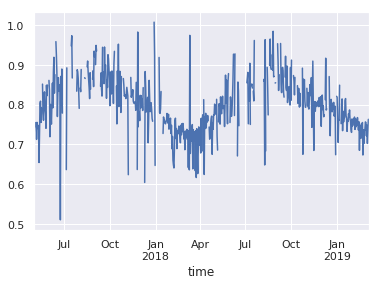

In [13]:
# Jupyter Notebook Plotting with interactive features
%matplotlib inline

# import plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Visualization the data with area_id of 18 
df[df.area_id == 18]['mean'].plot(kind='line')
plt.show()

Missing values are visible in these figures. 

Sometimes, instead of dropping a row with missing values, it's best to replace them with appropriate values. 
This is possible through several strategies such as forward / backward filling or interpolation. Let's first apply the linear interpolation and check if the issue has been solved. 

In [14]:
# Replacing missing values using linear interpolation approech
df = df.interpolate('linear')

df.isnull().sum()

area_id    0
time       0
count      0
max        0
mean       0
min        0
std        0
dtype: int64

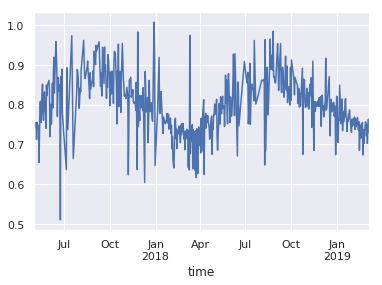

In [15]:

# Visualization the data with area_id of 18 
df[df.area_id == 18]['mean'].plot(kind='line')
plt.show()

### 4. Feature analysis

Although the maximum and minimum values are important, the mean and standard deviation are the most important factors. 
Let's assign a window based on mean and standard deviations and see if the maximum and minimum values are spaced out of this window. In other words, we want to make a comparison between the maximum data range and the appropriate statistical range. We will do this analysis for a couple of areas.

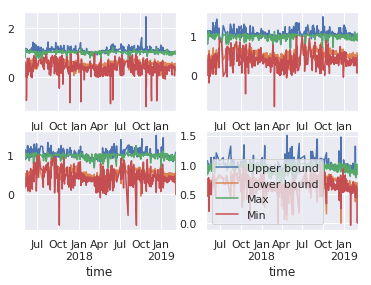

In [16]:
# For loop to select the first few areas
for i in Area_id[:4]:
    plt.subplot(2, 2, i-17)
    (df[df.area_id == i]['mean'] + 3 * df[df.area_id == i]['std']).plot()
    (df[df.area_id == i]['mean'] - 3 * df[df.area_id == i]['std']).plot()
    df[df.area_id == i]['max'].plot()
    df[df.area_id == i]['min'].plot()
    # plt.title(i)
plt.legend(['Upper bound', 'Lower bound', 'Max', 'Min'])
plt.show()

The results show that, except for the outliers, the maximum range of data is not too wide in comparison with the appropriate statistical range.

#### The effect of the number of pixels

To see the effect of the number of pixels, we need to first bring the values to a proper range. This can be done well through the MinMaxScaler scaler where the data lies in range from 0 to 1.

In [17]:
# Convert data with input dtype int to float
df['count'] = df['count'].astype(float)

# Scaling 'count' column by minmaxscaler 
# Import MinMaxScaler class 
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

# fit the model and transform the data into the desired values
df['count'] = scaler.fit_transform(df[['count']])


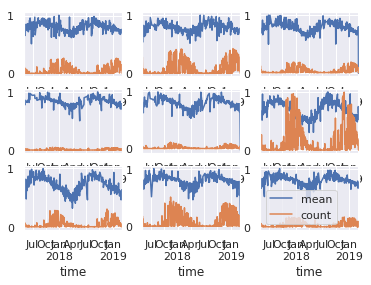

In [18]:
# For loop to select the first few areas
for i in Area_id[:9]:
    plt.subplot(3, 3, i-17)
    df[df.area_id == i]['mean'].plot()
    df[df.area_id == i]['count'].plot()
plt.legend(['mean', 'count'])
plt.show()

It seems the greater contribution of the pixels in statistics is seen for a certain period. But the point is the curve remains like a flying-bird shape, not the eagle ;), regardless of the number of pixels.

### 5. Detecting noises (outliers)

In simple words, outliers are data that are significantly different from the dataset and they can negatively impact the perdictive power of the model. 
One treatment for that is to replace outliers with more approperiate values. We have to be careful about its use, because it is often difficult to distinguish between a legitimately extreme value and an aberration. Again we calculate the cut-off for identifying outliers as more than 3 standard deviations from the mean.


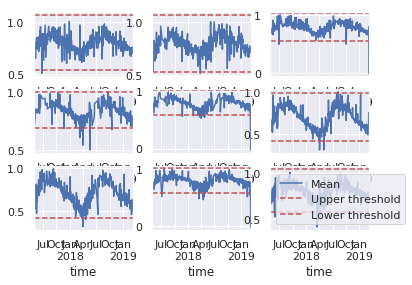

In [19]:
# For loop to select the first few areas
for i in Area_id[:9]:
    plt.subplot(3, 3, i-17)
    ax = df[df.area_id == i]['mean'].plot()
    ax.axhline(df[df.area_id == i]['mean'].mean() +  3.0 * df[df.area_id == i]['std'].mean(), ls='--', c='r')
    ax.axhline(df[df.area_id == i]['mean'].mean() -  3.0 * df[df.area_id == i]['std'].mean(), ls='--', c='r')
plt.legend(['Mean', 'Upper threshold', 'Lower threshold'])
plt.show()

These figures indicate that ouliers exist even with raw data, particularly passing the lower bound. Let's move on and continue with a more advanced approach to detect the outliers. This method relies not only on raw data, but also on change over time. 

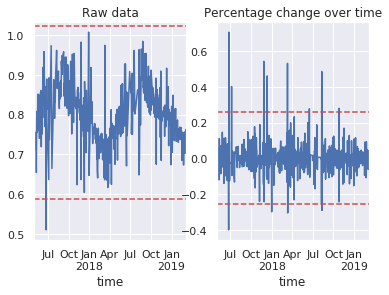

In [20]:
# Capture daily percentage changes for 'mean' column
df_pct_change = df[df.area_id == 18]['mean'].pct_change()

# The list of fig titles
title_list = ['Raw data', 'Percentage change over time']

fig, axs = plt.subplots(1, 2)
for data, ax, title in zip([df[df.area_id == 18]['mean'], df_pct_change], axs, title_list):
    the_mean = data.mean()
    the_std = data.std()
    
    # Plot the data, with a window that is 3 standard deviations # around the mean
    data.plot(ax=ax)
    ax.axhline(the_mean + the_std * 3, ls='--', c='r')
    ax.axhline(the_mean - the_std * 3, ls='--', c='r')
    ax.set_title(title)





The result clearly shows that percentage change over time is a better choice to detect the outliers in comparison with the raw data.

#### Replacing outliers using the threshold

In [21]:
# Center the data so the mean is 0
df_pct_change_centered = df_pct_change - df_pct_change.mean()

# Calculate standard deviation
std = df_pct_change_centered.std()

# Import numpy 
import numpy as np 

# Use the absolute value of each datapoint to make it easier to find outliers
outliers = np.abs(df_pct_change_centered) > (std * 3)

# Replace outliers with the median value
# We'll not use np.nanmean since there may be nans around the outliers
df_pct_change_fixed = df_pct_change_centered.copy()
df_pct_change_fixed[outliers]  = np.nanmedian(df_pct_change_fixed)

#### Visualize the results

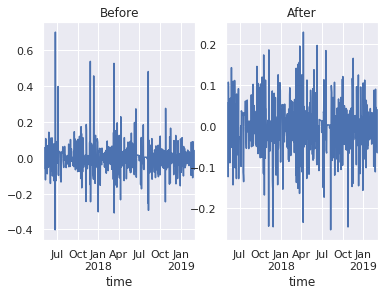

In [22]:
fig, axs = plt.subplots(1, 2)
df_pct_change_centered.plot(ax=axs[0])
axs[0].set_title('Before')
df_pct_change_fixed.plot(ax=axs[1])
axs[1].set_title('After')
plt.show()

#### Extract the new version of the raw data 

In [23]:
# Return the precentage change to the actual values
df_pct_change = df_pct_change_fixed + df_pct_change.mean()

Based on the obtained percentage-change data and using a for loop, an updated version, without outliers, of the original data can be extracted. Further we will introduce a simpler alternative for cleaning the data. 

#### Smoothing by time-average methods

Smoothing is another approach to somehow eliminate the outliers in order to better see the behavior of the data. 

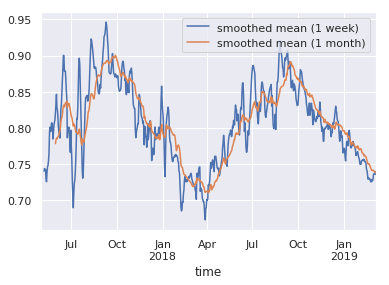

In [24]:
# Smoothing out by moving averages, here 7 days
mean_smooth_7 = df[df.area_id == 18]['mean'].rolling(window=7).mean()
ax1 = mean_smooth_7.plot()
# Smoothing out by moving averages, here 30 days ( 1 month) 
mean_smooth_30 = df[df.area_id == 18]['mean'].rolling(window=30).mean()
ax2 = mean_smooth_30.plot()
#ax4 = df[df.area_id == 18]['mean'].plot(kind='density')
plt.legend(['smoothed mean (1 week)', 'smoothed mean (1 month)'])
plt.show()

The figure, particularly with rolling over 30 days, shows a smooth flying-bird shape for the curve.

### 5. Time series decomposition

Time series decomposition involves a combination of observed, trend, seasonality, and noise components.


- Seasonality: does the data display a clear periodic pattern?
- Trend: does the data follow a consistent upwards or downwards slope?
- Noise: are there any outlier points or missing values that are not consistent with the rest of the data?

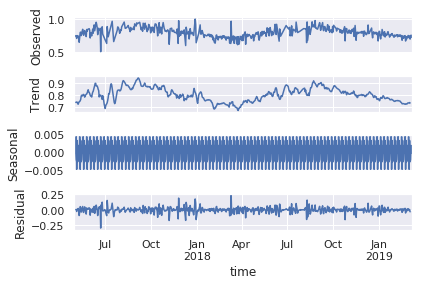

In [25]:
# Time series decomposition
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df[df.area_id == 18]['mean'])
decomposition.plot()
plt.show()

Trend seems to be the good choice to be used for forecasting with machine learning methods.

### 6. Forcasting using Autoregression Models

Autoregression is a time-series supervised type model that uses observations from previous time steps as inputs for the regression equation to predict the value at a later stage. It is a very simple idea that can result in accurate forecasts on a range of time series problems. 

In [26]:
# Check the trend data
print(decomposition.trend.head())
print(decomposition.trend.tail())

time
2017-05-01         NaN
2017-05-02         NaN
2017-05-03         NaN
2017-05-04    0.740441
2017-05-05    0.743890
Name: mean, dtype: float64
time
2019-03-03    0.739790
2019-03-04    0.736202
2019-03-05         NaN
2019-03-06         NaN
2019-03-07         NaN
Name: mean, dtype: float64


In [27]:
# Filling the nans using backward and forward methods simultaneously 
trend = decomposition.trend.fillna(method='ffill').fillna(method='bfill')

/home/behrouz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/behrouz/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


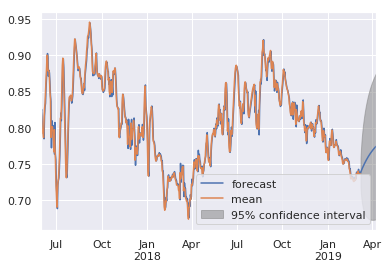

In [28]:
# Autoregression Model for Forcasting
from statsmodels.tsa.arima_model import ARMA
mod = ARMA(trend, order=(1,1), freq='D')
result = mod.fit()
result.plot_predict(start='2017-05-31', end='2019-04-08')
plt.show()

The forcast has been considered for the period from 2019-03-08 to 2019-04-08. This forecasting was for the area with ID18. By constructing a for loop and extracting only the trends, the same analysis can be done easily for all areas.

### 7.  Hierarchical clustering and Correlation

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data. 
Here, this approach seeks clustering of areas based on NDVI data.
Correlation, as the name stands for, seeks to identify correlation among the diffrent areas based on the data. The correlation is so called Pearson correlation. Pearson correlation measures the linear association between continuous variables.

The correlation coefficient has values between -1 to 1:
- A value closer to 0 implies weaker correlation.
- A value closer to 1 implies stronger positive correlation.
- A value closer to -1 implies stronger negative correlation.

Both clustirng and correlation can be done simultaneously by a powerful command in the seaborn (clustermap). 
But to do this, we need to create a new DataFrame and assign a column for each area.


In [29]:
# Create empty dataframe
df_new = pd.DataFrame()

# Construct a new dataftame from 'mean' column of the main dataframe
for i in Area_id:
    df_new[str(i)] = df[df.area_id == i]['mean']

# inspect the new dataset    
df_new.head(2)

,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,60.0,61.0,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0
time,,,,,,,,,,,,,,,,,,,,,
2017-05-01,0.715773,0.699701,0.681549,0.761292,0.710721,0.515400,0.525364,0.695195,0.730985,0.789797,...,0.620707,0.348134,0.510873,0.510171,0.565214,0.403357,0.511608,0.445977,0.489867,0.477237
2017-05-02,0.754802,0.703582,0.708563,0.822238,0.764155,0.563827,0.610650,0.643122,0.776964,0.733195,...,0.644119,0.424273,0.521644,0.552246,0.668478,0.449657,0.682759,0.461730,0.534417,0.507852


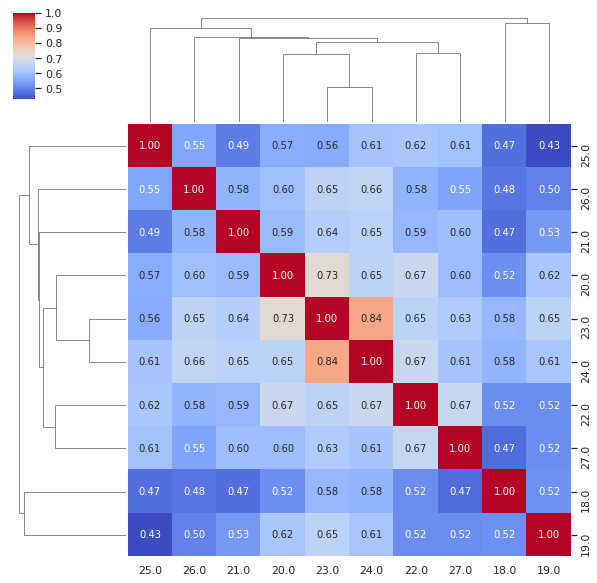

In [30]:
# Correlation matrix between the first 10 areas    
sns.clustermap(df_new.iloc[:,0:10].corr(), annot=True, fmt = ".2f", cmap = "coolwarm" )

The values represent the positive correlation between the first 10 areas. However, a correlation value is for similarity in the trend, not for data values. Similarities in data values can be identified through clustering. For example, close similarity between areas 23 and 24 can be seen.

### 8. SoS & PoS detecting

NDVI data is expected to have the lowest values at the start / end of the season. So to identify the start of the season, we should first identify the date with the lowest NDVI values. In order to avoid the negative effect of noise, the analysis should be better done on the trend not the raw data. 

In [31]:
# 20 largest values in column Salary 
for i in df_new.columns:
    #print('SoS of area', i)
    decomposition = sm.tsa.seasonal_decompose(df_new[str(i)])
    freq = decomposition.trend.nsmallest(60).index.month.value_counts()
    sos =  freq[:2].index.max()
    print('SoS for area', i, 'is in month:', sos)
    freq = decomposition.trend.nlargest(60).index.month.value_counts() 
    pos = freq[:1].index.max()
    print('PoS for area', i, 'is in month:', pos)
    print('\n')

SoS for area 18.0 is in month: 3
PoS for area 18.0 is in month: 9


SoS for area 19.0 is in month: 5
PoS for area 19.0 is in month: 9


SoS for area 20.0 is in month: 3
PoS for area 20.0 is in month: 7


SoS for area 21.0 is in month: 6
PoS for area 21.0 is in month: 7


SoS for area 22.0 is in month: 4
PoS for area 22.0 is in month: 9


SoS for area 23.0 is in month: 4
PoS for area 23.0 is in month: 8


SoS for area 24.0 is in month: 4
PoS for area 24.0 is in month: 8


SoS for area 25.0 is in month: 4
PoS for area 25.0 is in month: 9


SoS for area 26.0 is in month: 4
PoS for area 26.0 is in month: 8


SoS for area 27.0 is in month: 5
PoS for area 27.0 is in month: 7


SoS for area 28.0 is in month: 4
PoS for area 28.0 is in month: 8


SoS for area 29.0 is in month: 4
PoS for area 29.0 is in month: 8


SoS for area 30.0 is in month: 4
PoS for area 30.0 is in month: 8


SoS for area 31.0 is in month: 4
PoS for area 31.0 is in month: 8


SoS for area 32.0 is in month: 4
PoS for area 32

In concordance with the similarity between the domains 23 and 24 obtained from clustering, the result here shows the same SoS and PoS for these two areas.